<a href="https://colab.research.google.com/github/mariaclaraseixa/EVcharging-datascience/blob/main/Data_Science_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- First 5 rows of the dataset: ---


,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually



--- General information about the dataset: ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station ID                   5000 non-null   object 
 1   Latitude                     5000 non-null   float64
 2   Longitude                    5000 non-null   float64
 3   Address                      5000 non-null   object 
 4   Charger Type                 5000 non-null   object 
 5   Cost (USD/kWh)               5000 non-null   float64
 6   Availability                 5000 non-null   object 
 7   Distance to City (km)        5000 non-null   float64
 8   Usage Stats (avg users/day)  5000 non-null   int64  
 9   Station Operator             5000 non-null   object 
 10  Charging Capacity (kW)       5000 non-null   int64  
 11  Connector Types              5000 non-null   object 
 12  Installation Year           

,Latitude,Longitude,Cost (USD/kWh),Distance to City (km),Usage Stats (avg users/day),Charging Capacity (kW),Installation Year,Reviews (Rating),Parking Spots
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,19.942607,8.833487,0.300196,10.201810,55.453800,144.272000,2016.569400,3.994800,5.519600
std,32.315818,93.724046,0.115733,5.608316,26.494986,128.370674,4.004746,0.582667,2.874103
min,-89.680850,-178.870028,0.100000,0.500000,10.000000,22.000000,2010.000000,3.000000,1.000000
25%,13.758953,-87.680319,0.200000,5.430000,32.000000,50.000000,2013.000000,3.500000,3.000000
50%,34.029053,18.495233,0.300000,10.190000,56.000000,150.000000,2017.000000,4.000000,5.000000
75%,41.840249,100.454629,0.400000,14.902500,79.000000,350.000000,2020.000000,4.500000,8.000000
max,89.464534,179.664661,0.500000,20.000000,100.000000,350.000000,2023.000000,5.000000,10.000000



--- Count of missing values per column: ---
Station ID                     0
Latitude                       0
Longitude                      0
Address                        0
Charger Type                   0
Cost (USD/kWh)                 0
Availability                   0
Distance to City (km)          0
Usage Stats (avg users/day)    0
Station Operator               0
Charging Capacity (kW)         0
Connector Types                0
Installation Year              0
Renewable Energy Source        0
Reviews (Rating)               0
Parking Spots                  0
Maintenance Frequency          0
dtype: int64

Number of duplicate rows found: 0

--- Analyzing outliers in column 'Usage Stats (avg users/day)' ---


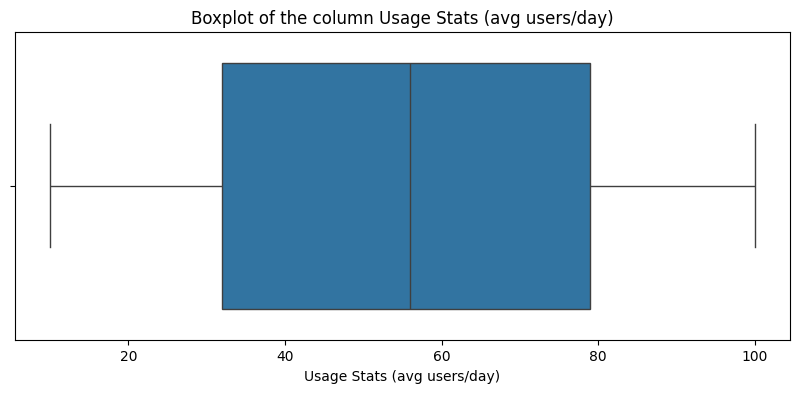

Lower limit: -38.5
Upper limit: 149.5

Original shape: (5000, 17)
Shape without outliers: (5000, 17)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

seu_dataset = '/detailed_ev_charging_stations.csv'
df = pd.read_csv(seu_dataset)

print("--- First 5 rows of the dataset: ---")
display(df.head())

print("\n--- General information about the dataset: ---")
df.info()

print("\n--- Descriptive Statistics: ---")
display(df.describe())

print("\n--- Count of missing values per column: ---")
print(df.isnull().sum())

duplicatas = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicatas}")

coluna_para_analise = 'Usage Stats (avg users/day)'

if coluna_para_analise in df.columns and pd.api.types.is_numeric_dtype(df[coluna_para_analise]):
    print(f"\n--- Analyzing outliers in column '{coluna_para_analise}' ---")

    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[coluna_para_analise])
    plt.title(f'Boxplot of the column {coluna_para_analise}')
    plt.show()

    Q1 = df[coluna_para_analise].quantile(0.25)
    Q3 = df[coluna_para_analise].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    print(f"Lower limit: {lower_limit}")
    print(f"Upper limit: {upper_limit}")

    df_without_outliers = df[(df[coluna_para_analise] >= lower_limit) & (df[coluna_para_analise] <= upper_limit)]

    print(f"\nOriginal shape: {df.shape}")
    print(f"Shape without outliers: {df_without_outliers.shape}")

else:
    print(f"The column '{coluna_para_analise}' was not found or is not numeric. Please choose another column.")


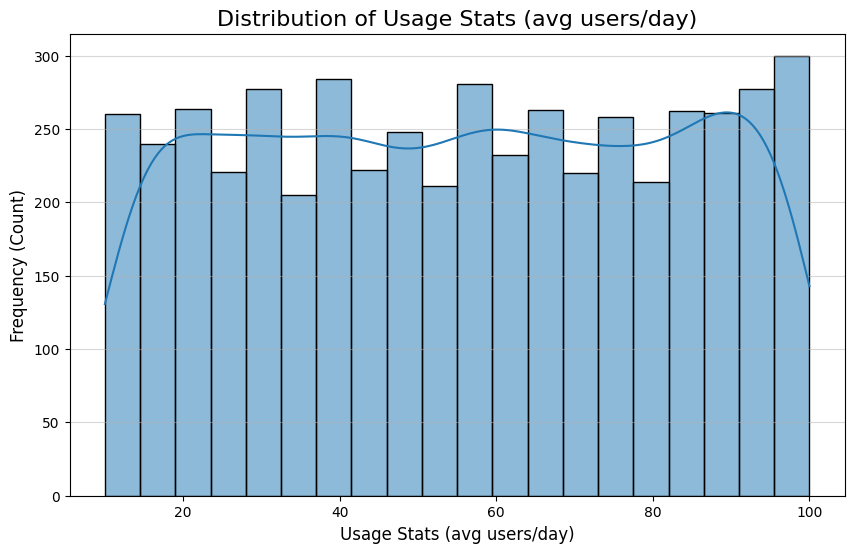

In [2]:
numeric_column = "Usage Stats (avg users/day)"

if numeric_column in df.columns:
    plt.figure(figsize=(10, 6))

    sns.histplot(df[numeric_column], kde=True, bins=20)

    plt.title(f"Distribution of {numeric_column}", fontsize=16)
    plt.xlabel(numeric_column, fontsize=12)
    plt.ylabel("Frequency (Count)", fontsize=12)
    plt.grid(axis="y", alpha=0.5)
    plt.show()

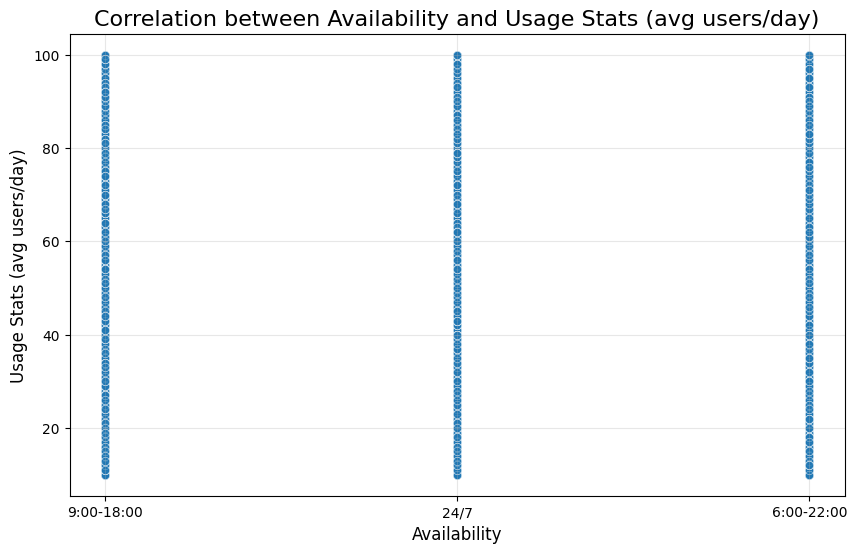

In [3]:
var_x = 'Availability'
var_y = 'Usage Stats (avg users/day)'

if var_x in df.columns and var_y in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[var_x], y=df[var_y], alpha=0.6)
    plt.title(f'Correlation between {var_x} and {var_y}', fontsize=16)
    plt.xlabel(var_x, fontsize=12)
    plt.ylabel(var_y, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

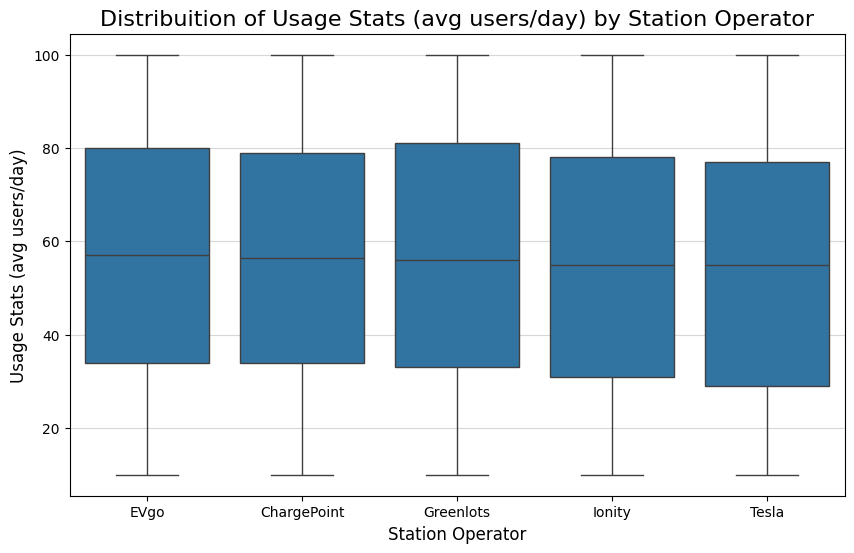

In [4]:
var_categorica = "Station Operator"
var_numerica = "Usage Stats (avg users/day)"

if var_categorica in df.columns and var_numerica in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var_categorica], y=df[var_numerica])
    plt.title(f"Distribuition of {var_numerica} by {var_categorica}", fontsize=16)
    plt.xlabel(var_categorica, fontsize=12)
    plt.ylabel(var_numerica, fontsize=12)
    plt.grid(axis="y", alpha=0.5)
    plt.show()


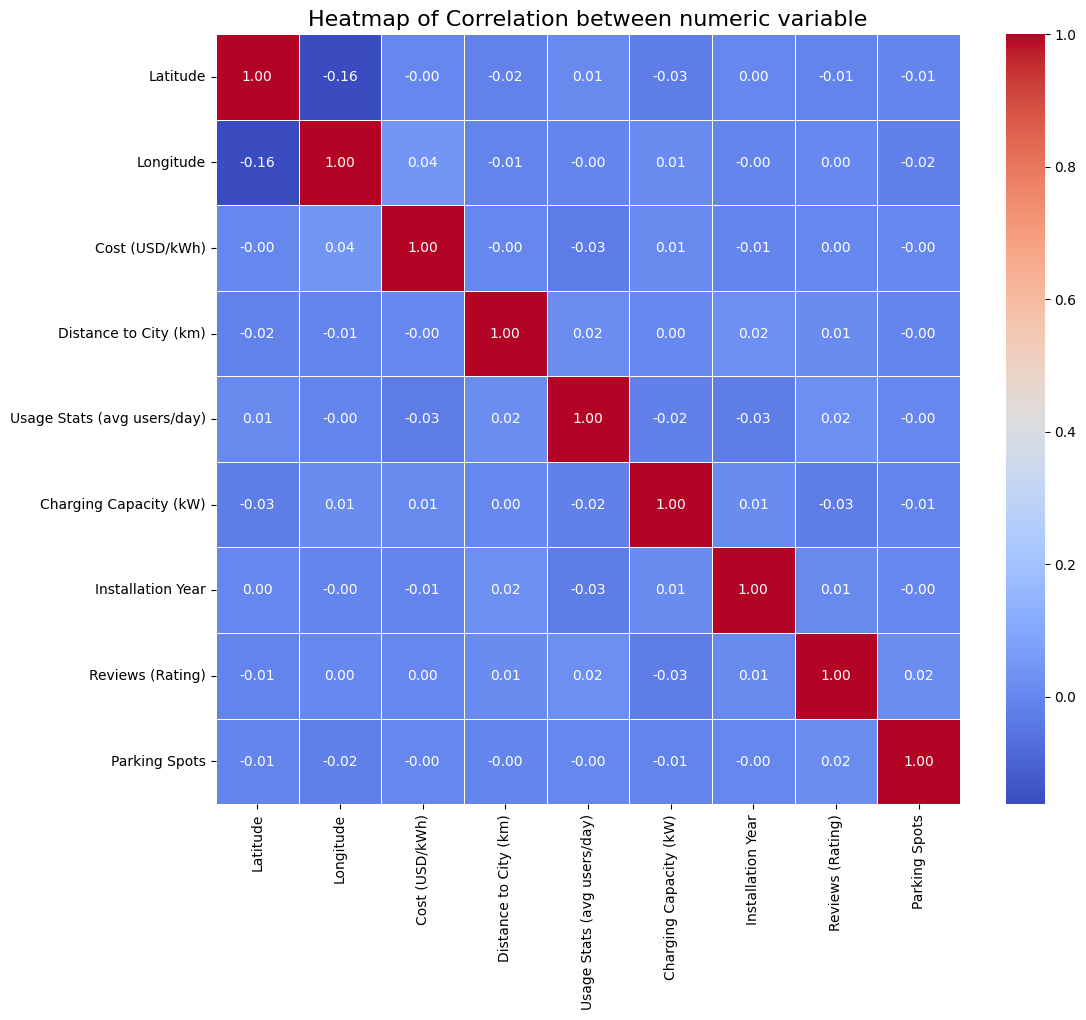

In [7]:



df_numeric = df.select_dtypes(include=['number'])

correlation_matrix = df_numeric.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)
plt.title('Heatmap of Correlation between numeric variable', fontsize=16)

plt.title('Heatmap of Correlation between numeric variable', fontsize=16)
plt.show()


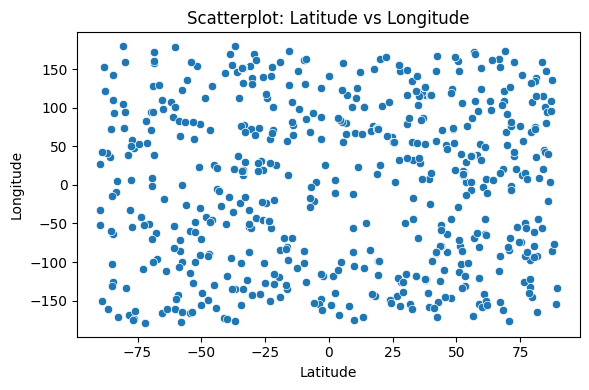

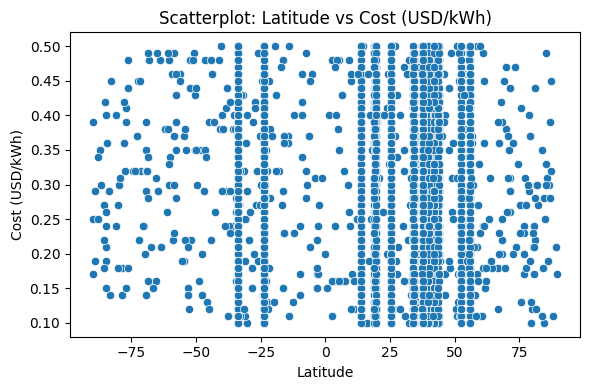

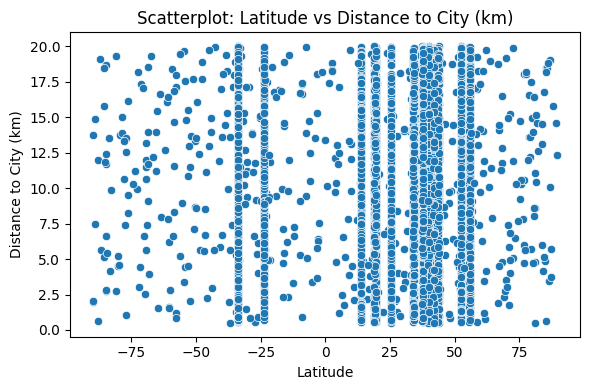

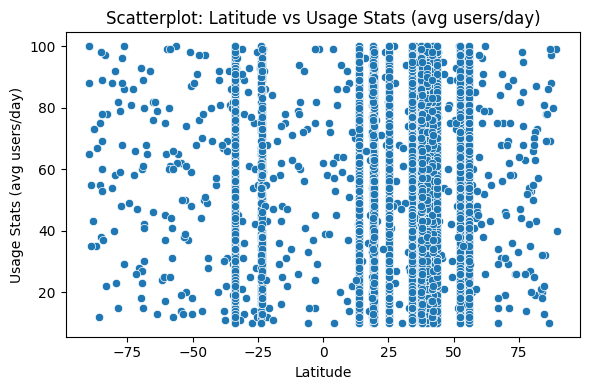

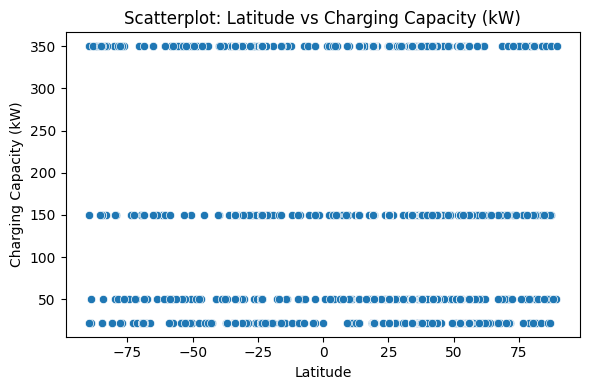

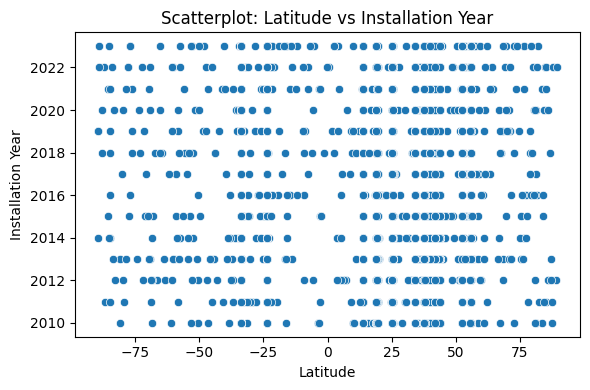

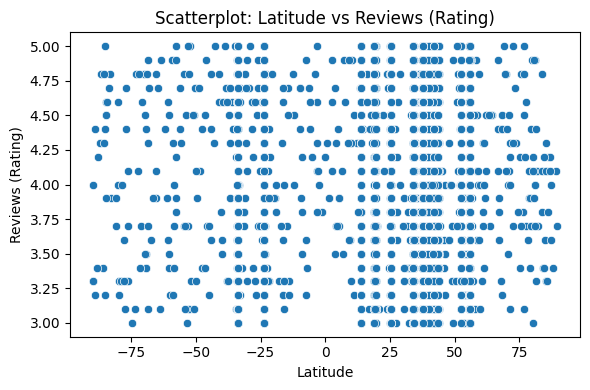

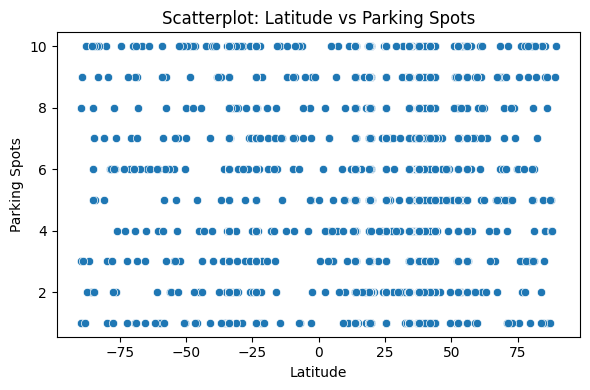

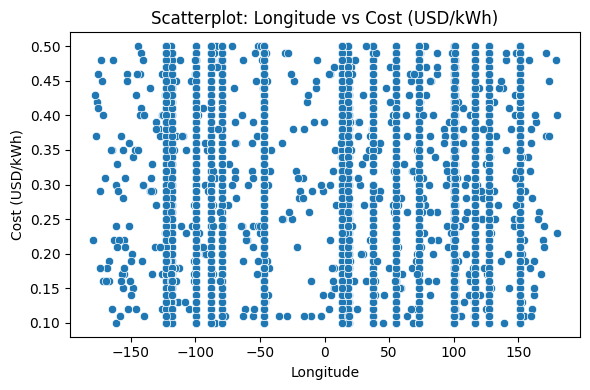

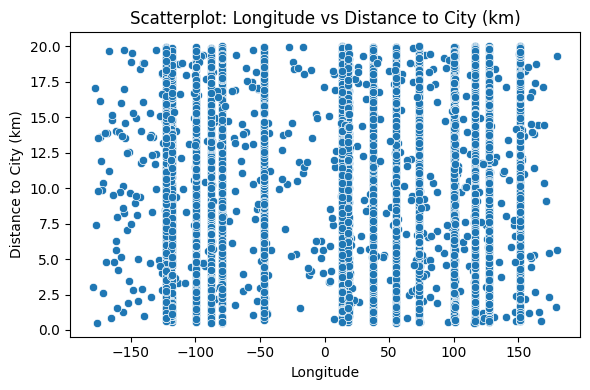

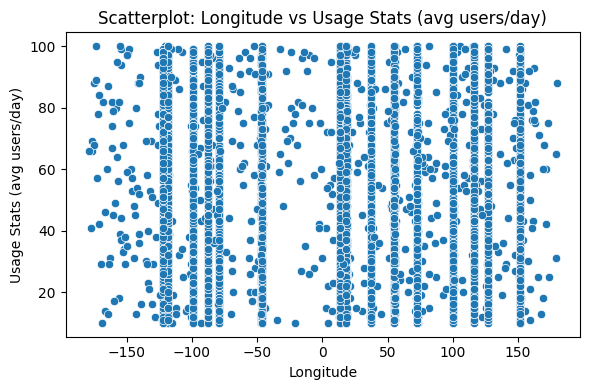

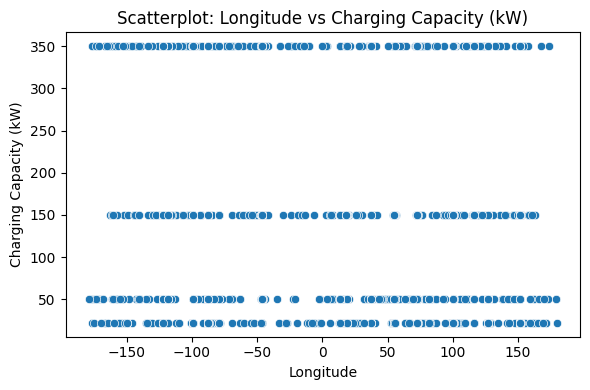

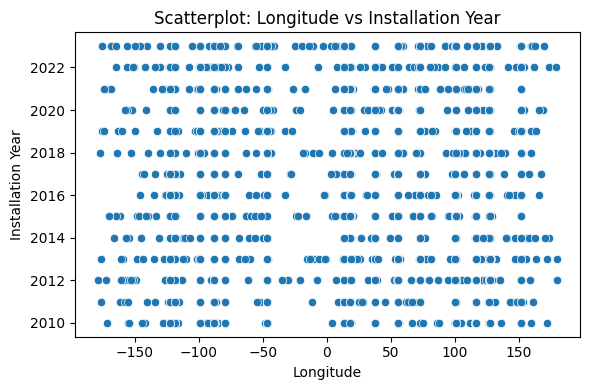

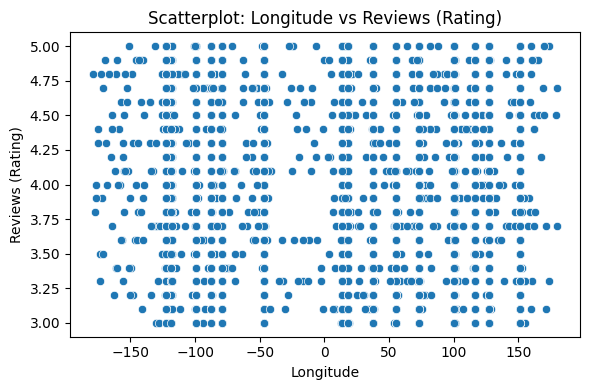

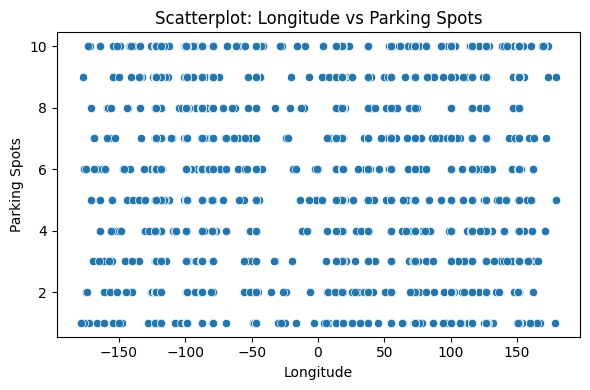

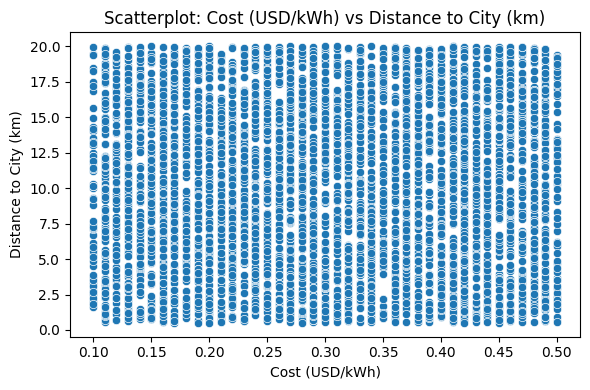

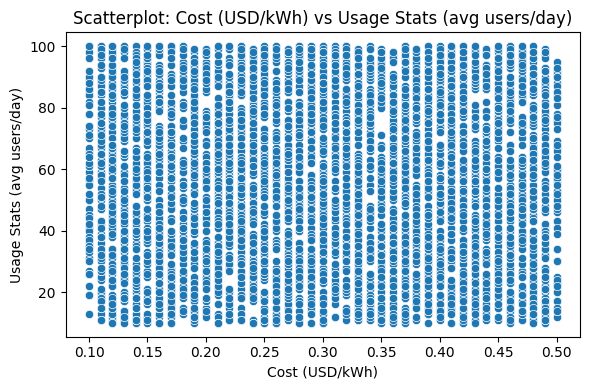

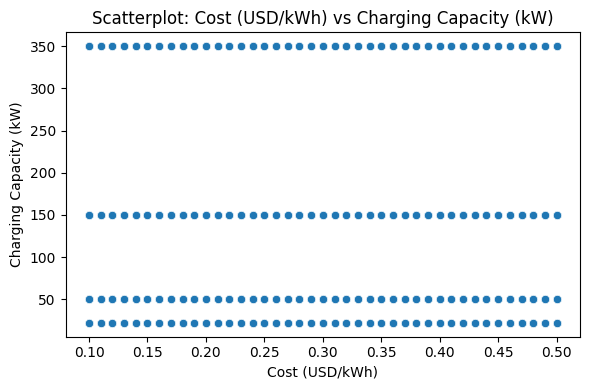

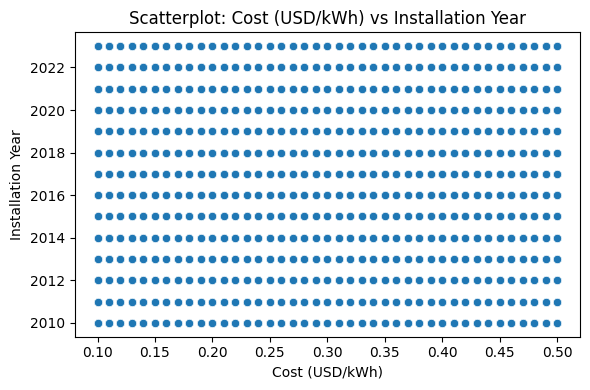

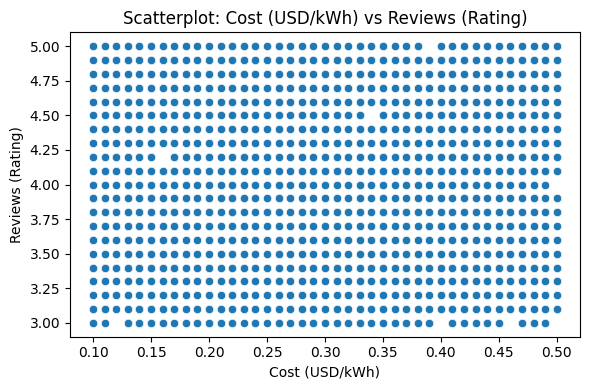

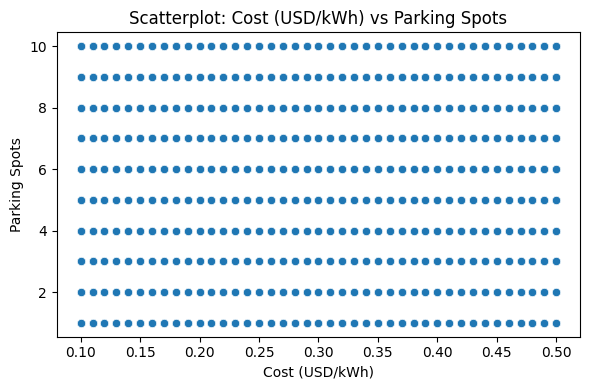

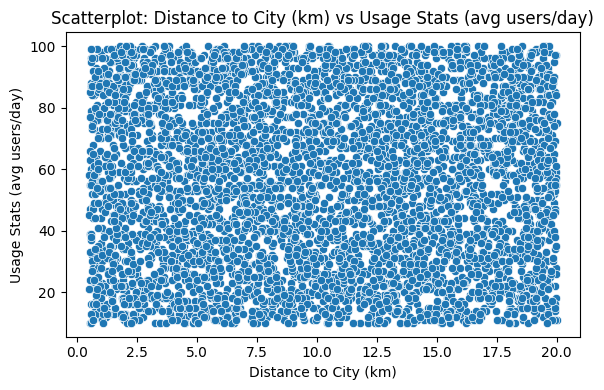

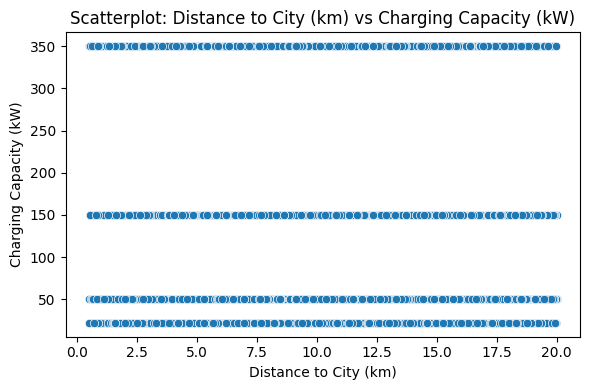

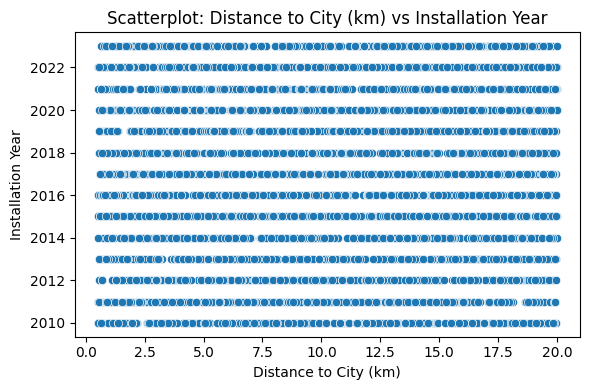

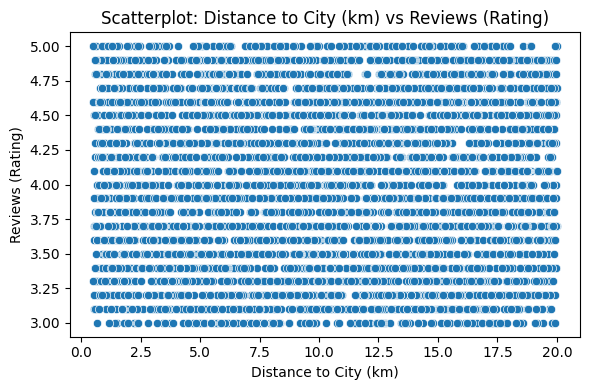

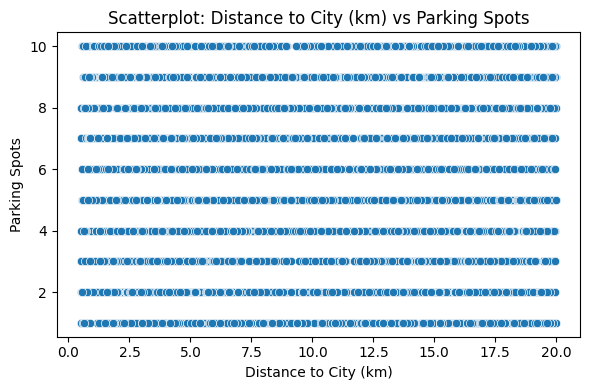

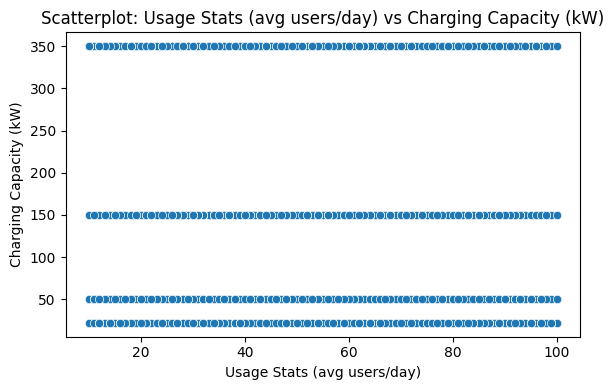

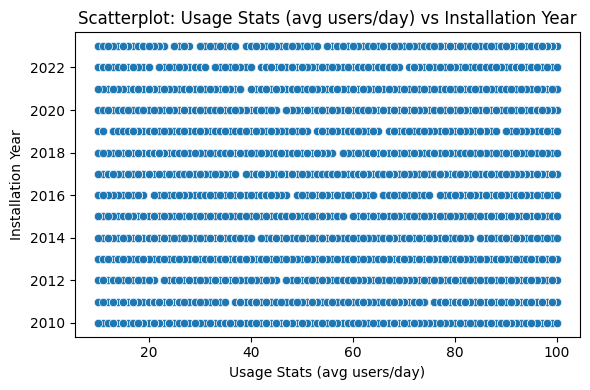

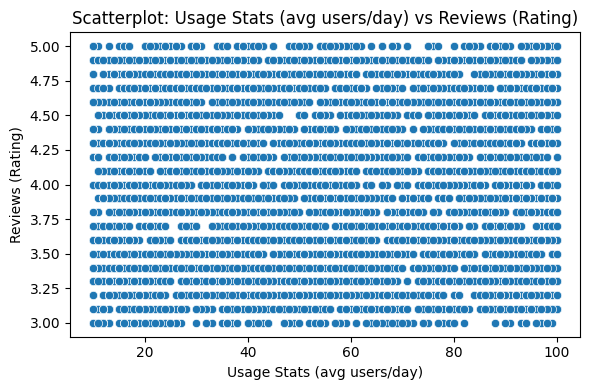

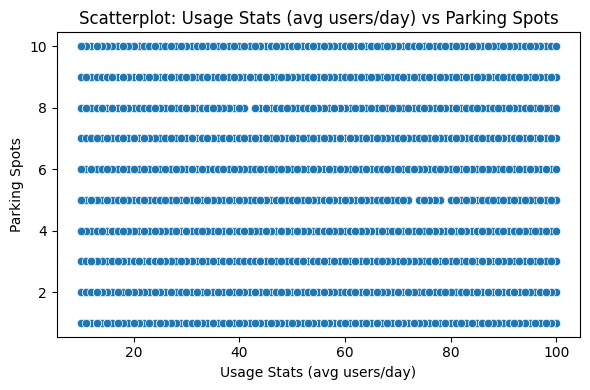

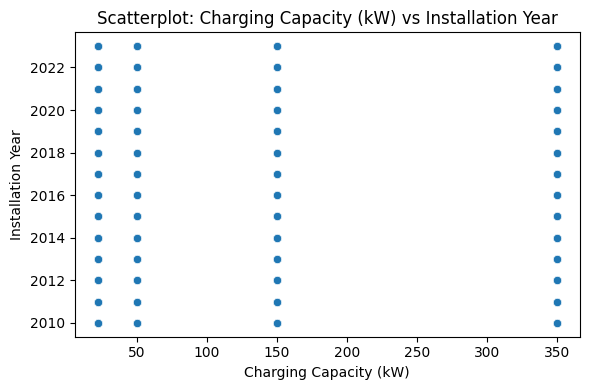

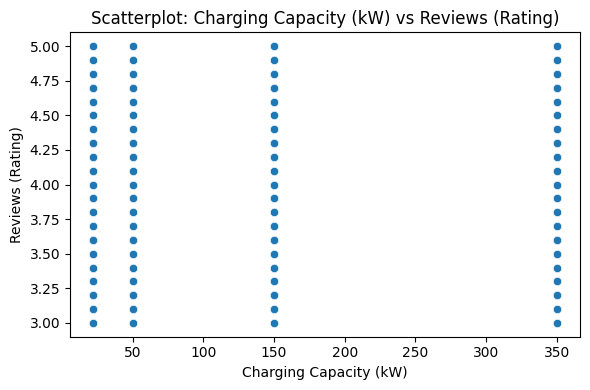

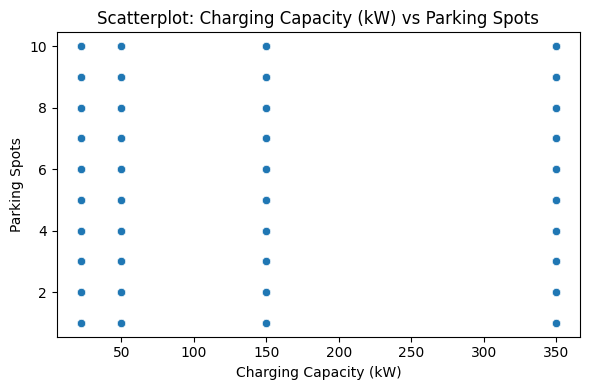

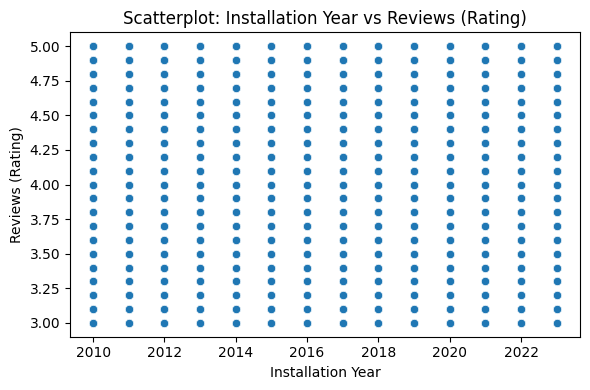

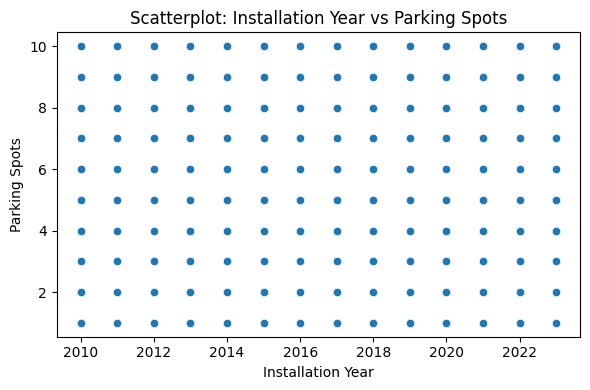

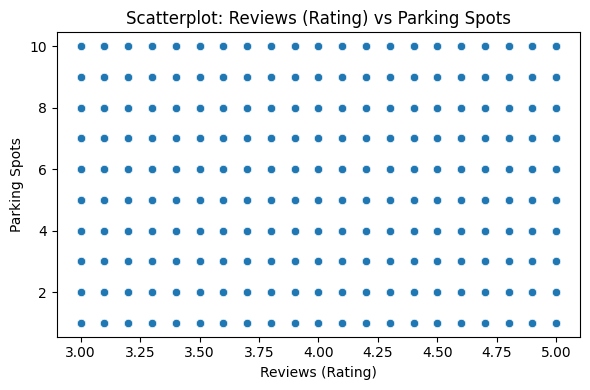

In [8]:
import itertools
import seaborn as sns

df_numeric = df.select_dtypes(include=['number'])

combinacoes = list(itertools.combinations(df_numeric.columns, 2))

for x, y in combinacoes:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'Scatterplot: {x} vs {y}')
    plt.tight_layout()
    plt.show()

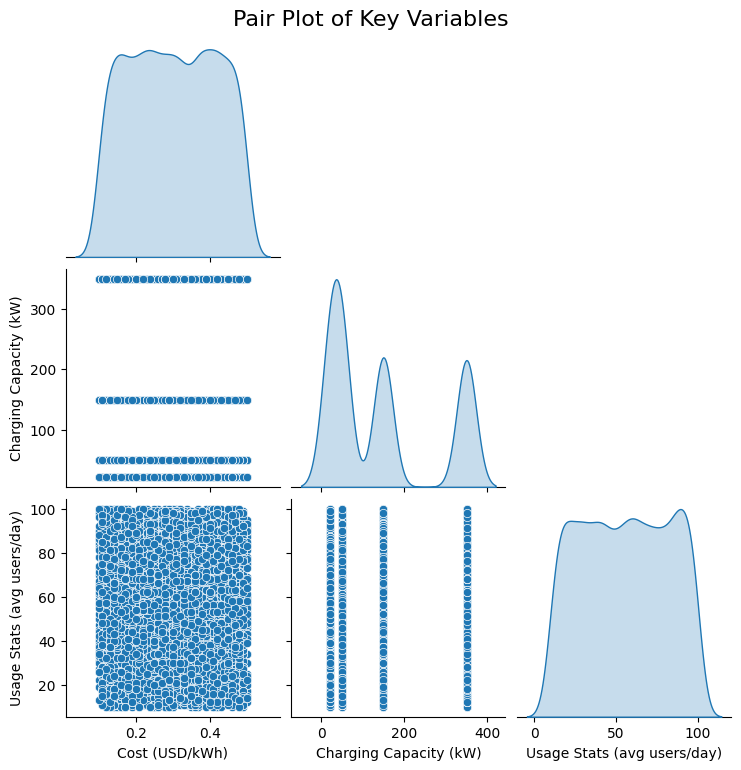

In [12]:
columns_for_pairplot = ['Cost (USD/kWh)', 'Charging Capacity (kW)', 'Usage Stats (avg users/day)']


existing_columns = [col for col in columns_for_pairplot if col in df.columns]

if len(existing_columns) > 1:

    hue_col = 'charger_type' if 'charger_type' in df.columns else None

    sns.pairplot(
        df[existing_columns + ([hue_col] if hue_col else [])],
        hue=hue_col,
        diag_kind='kde',
        corner=True,
    )

    plt.suptitle('Pair Plot of Key Variables', y=1.02, fontsize=16)
    plt.show()
else:
    print("Select at least two existing columns for the pair plot.")